Tutorial em texto para os inscritos no meu curso de Machine Learning na Udemy sobre a identificação de peças de roupa utilizando o conjunto de dados Fashion MNIST.

Importamos as bibliotecas utilizadas. Nesta análise estamos utilizando as bibliotecas **Tensorflow** e **Keras**.

In [1]:
from __future__ import absolute_import, division, print_function
from PIL import Image
import requests
from io import BytesIO

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importamos o Conjunto de Dados com os respectivos dados em separado para treinamento e para teste. Em seguida definimos o nome das classes dos elementos no conjunto de dados.

O conjunto de dados possui vários itens de vestuário: camisetas, calças, pulôvers, vestidos, casacos
sandálias, camisas, sapatilhas, bolsas e botas de tornozelo.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


Podemos facilmente visualizar um dos itens desse conjunto de dados criando uma figura:

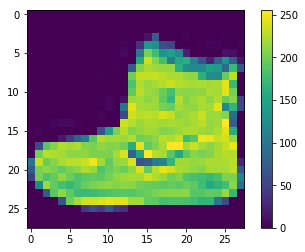

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

No caso a figura de uma bota.

Neste problema de Machine Learning nós teremos que realizar a técnica de *Feature Scaling* para normalizar o valor da features. Dessa forma, dividimos os dados, que representam os pixels das imagens, por 255 que representa 255 profundidades de cores de 0-255, sendo 0 a ausência de cor (escuro) e 255 a cor mais clara (branca) em tons de cinza:

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Podemos visualizar os diferentes itens do conjuntos de dados lado a lado:

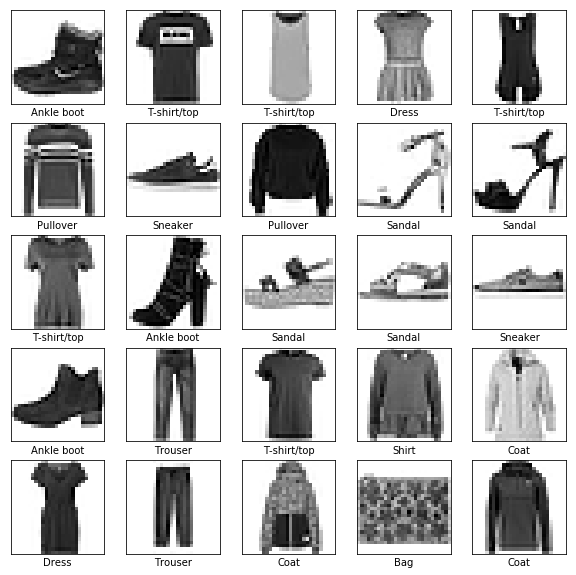

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Vamos utilizar um algoritmo de Rede Neural para solucionar este problema (identificar o tipo de vestuário em uma imagem). Construímos nosso modelo com a biblioteca Keras e TensorFlow funcionando em conjunto:

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Treinamos o algoritmo:

In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5020 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3796 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3415 - acc: 0.8759
Epoch 4/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3163 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3000 - acc: 0.8887


E testamos a sua precisão:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3499 - acc: 0.8735
Test accuracy: 0.8735


In [9]:
predictions = model.predict(test_images)

Criamos duas funções que criam duas visualizações, uma mostrando a imagem da peça de roupa e outra mostrando o valor em % da previsão alcançada pelo algoritmo.

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Conseguimos visualizar qual foi a previsão feita pelo algoritmo em relação a primeira figura:

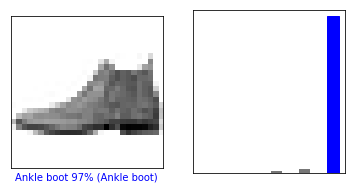

In [11]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Podemos visualizar também a previsão de diversas imagens em uma mesma figura:

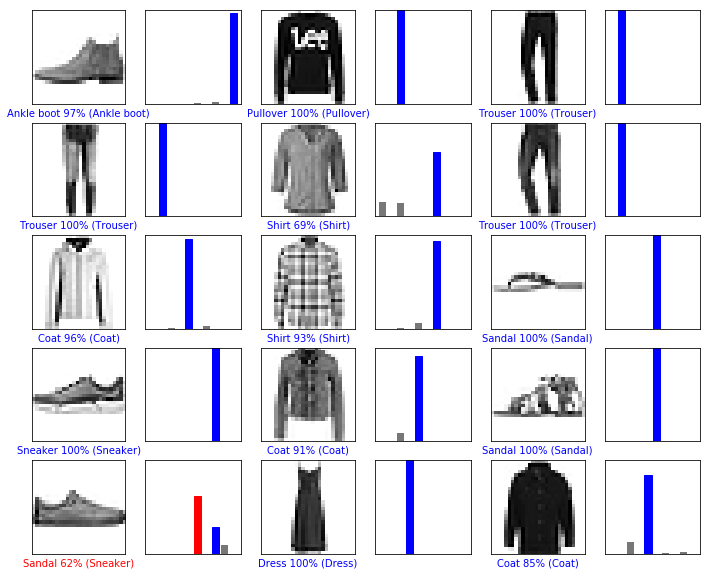

In [12]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

É possível ver que uma das figuras foi classificada de forma errada. A figura era de um tênis, mas foi classificada como uma sandália. Isto mostra que apesar do modelo possuir uma precisão alta (88%), mesmo assim alguns itens podem ser classificados de forma errada pelo algoritmo. Aumentar os dados para treinamento pode ajudar a minimizar este tipo de problema.

Em seguida, podemos utilizar nosso modelo treinado para fazer a previsão de uma imagem totalmente nova!

No caso, tirei a foto do MEU PRÓPRIO tênis, coloquei no mesmo formato das imagens treinadas 28x28 pixels e forneci a imagem para o algortimo tentar descobrir o que era:

![](https://i.imgur.com/pbaudkC.jpg)

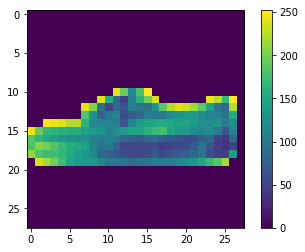

In [13]:
# URL de uma imagem extra
image_url = 'http://i.imgur.com/xa5Ethk.jpg'

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img.load()

npdata = np.asarray( img, dtype="int32" )
npdata = (npdata[:,:,:3] * [0.2989, 0.5870, 0.1140]).sum(axis=2)    
single_image = Image.fromarray( np.asarray( npdata, dtype="uint8"), "L" )
single_image = np.array(single_image)
single_image[single_image >= 253] = 0   

plt.figure()
plt.imshow(single_image)
plt.colorbar()
plt.grid(False)
plt.show()

single_image = single_image / 255

single_image = (np.expand_dims(single_image,0))

E deu certo! O algoritmo conseguiu identificar que a imagem do meu tênis é realmente um tênis (sneaker em inglês):

[[5.1349517e-08 6.3161887e-10 5.8231228e-07 7.0101747e-09 7.9994749e-09
  1.1041393e-02 1.0599079e-08 9.8895723e-01 6.0862192e-07 8.8870344e-08]]
7


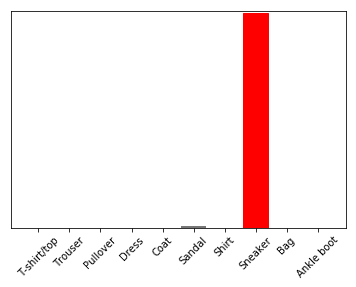

In [14]:
predictions_single = model.predict(single_image)
print(predictions_single)

print(np.argmax(predictions_single[0]))
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Este exemplo pode ser aplicado para identificar diversas coisas. Basta fornecer um conjunto de dados para treinamento devidamente classficado e a Rede Neural irá aprender com esses dados.